In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt



In [2]:
import json
def load_json(filename):
    with open(filename) as data_file:
        result = json.load(data_file)

    return result

def load_history_dict(filename):
    history = load_json(filename)

    history_dict = dict()
    for game in history:
        history_dict[game["id"]] = game

    return history_dict


In [3]:
def normalize(values):
    max_value = max(values)
    if max_value == 0.:
        return list
    return [x/max_value for x in values]


In [26]:
END_NOT_TAKEN = 2
MIN_GAMES_COUNT = 30
history_dict = load_history_dict('/home/workedbee/projects/pythia/data/marathon_khl.json')

game_id_to_graph = dict()
for key, value in history_dict.items():
    if len(value['odds']) < MIN_GAMES_COUNT:
        continue

    recent_odds = value['odds'][-MIN_GAMES_COUNT:-END_NOT_TAKEN]

    win_a = [x['winA'] for x in recent_odds]
    win_b = [x['winB'] for x in recent_odds]

    game_id_to_graph[key + '_a'] = normalize(win_a)
    game_id_to_graph[key + '_b'] = normalize(win_b)
    
print len(game_id_to_graph)


7673912
{u'date': u'2019-02-07 22:30:57', u'odds': [{u'winB': 1.92, u'draw': 4.5, u'winA': 3.18, u'time': u'2019-02-06 17:30:56'}, {u'winB': 1.82, u'draw': 4.55, u'winA': 3.46, u'time': u'2019-02-06 18:30:56'}, {u'winB': 1.82, u'draw': 4.55, u'winA': 3.46, u'time': u'2019-02-06 19:30:57'}, {u'winB': 1.83, u'draw': 4.55, u'winA': 3.42, u'time': u'2019-02-06 20:30:56'}, {u'winB': 1.83, u'draw': 4.55, u'winA': 3.42, u'time': u'2019-02-06 21:30:56'}, {u'winB': 1.85, u'draw': 4.5, u'winA': 3.38, u'time': u'2019-02-06 22:30:57'}, {u'winB': 1.86, u'draw': 4.55, u'winA': 3.32, u'time': u'2019-02-06 23:30:57'}, {u'winB': 1.86, u'draw': 4.55, u'winA': 3.32, u'time': u'2019-02-07 00:30:56'}, {u'winB': 1.86, u'draw': 4.55, u'winA': 3.32, u'time': u'2019-02-07 01:30:56'}, {u'winB': 1.85, u'draw': 4.5, u'winA': 3.38, u'time': u'2019-02-07 02:30:57'}, {u'winB': 1.85, u'draw': 4.5, u'winA': 3.38, u'time': u'2019-02-07 03:30:57'}, {u'winB': 1.833, u'draw': 4.55, u'winA': 3.42, u'time': u'2019-02-07 04:

In [ ]:
game_id_to_graph = dict()
x = []
y = []
for key, value in history_dict.items():
    if len(value['odds']) < i:
        continue
    
    current_x = value['odds'][0]['winA']
    current_y = 1.
    x.append(current_x)
    y.append(current_y)

    current_x = value['odds'][0]['winB']
    current_y = 1.
    x.append(current_x)
    y.append(current_y)
           

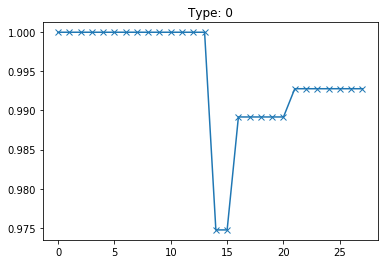

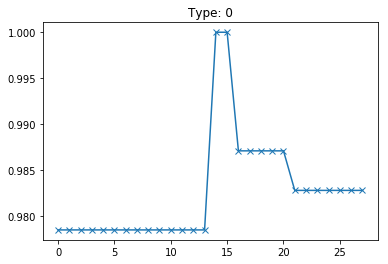

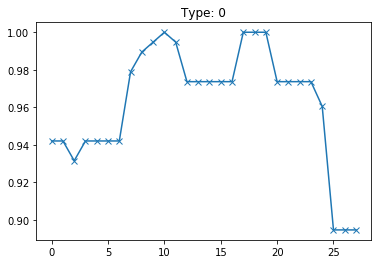

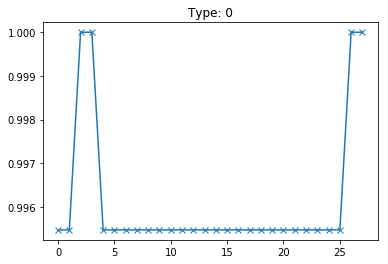

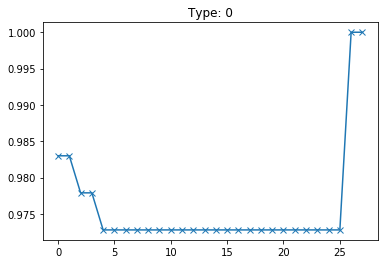

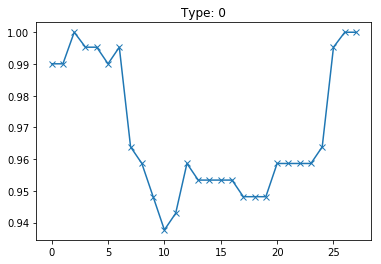

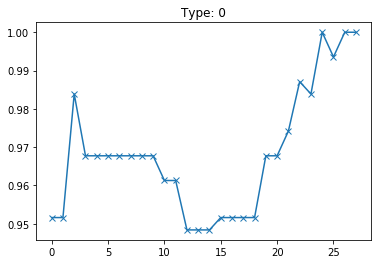

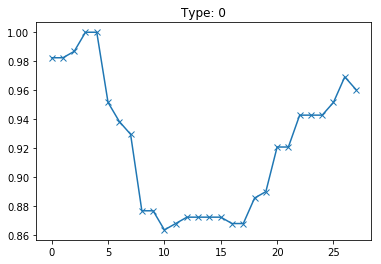

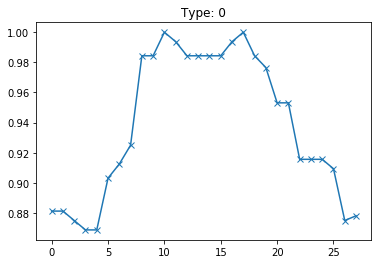

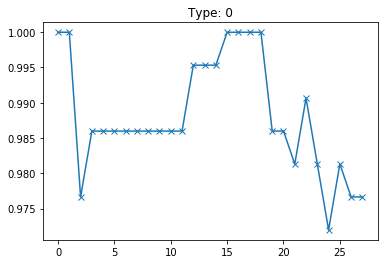

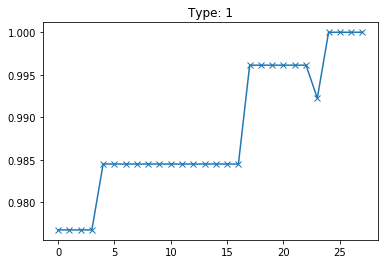

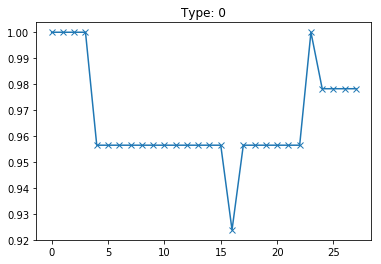

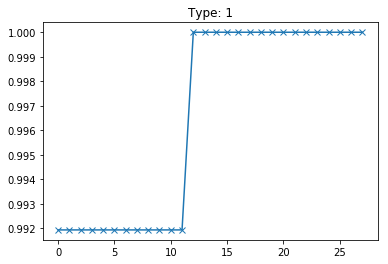

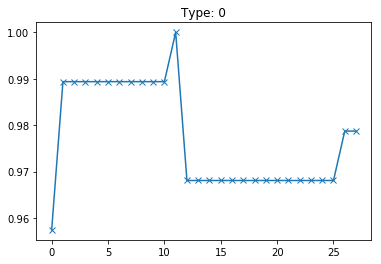

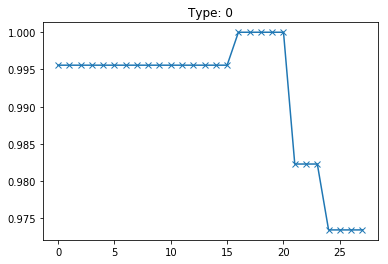

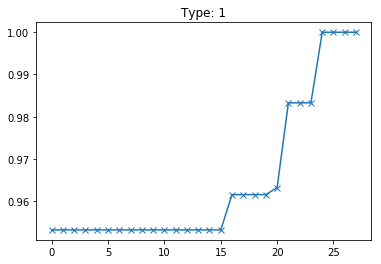

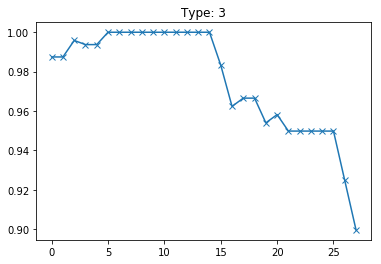

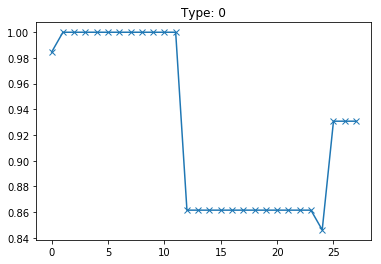

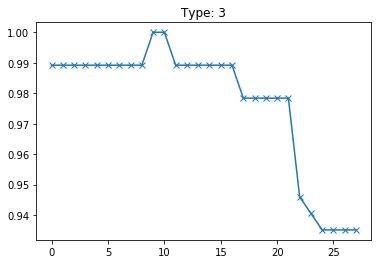

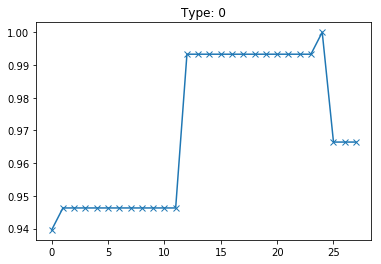

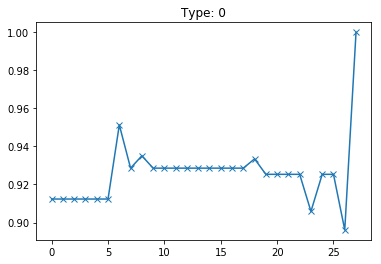

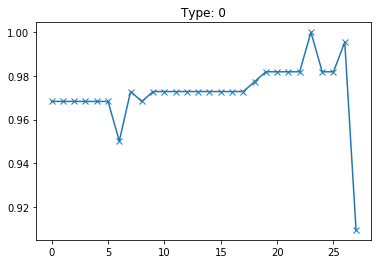

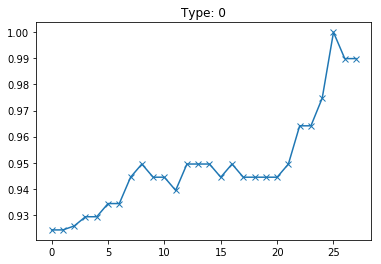

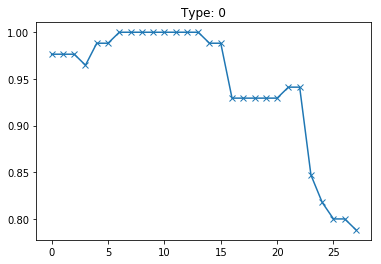

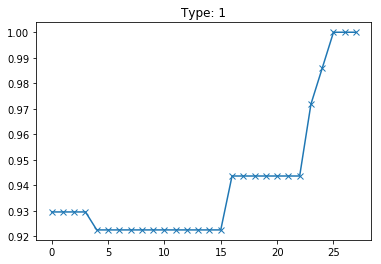

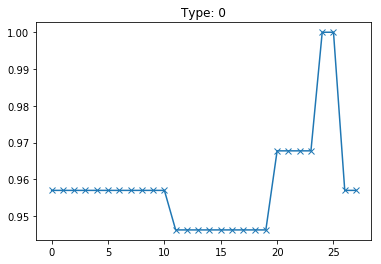

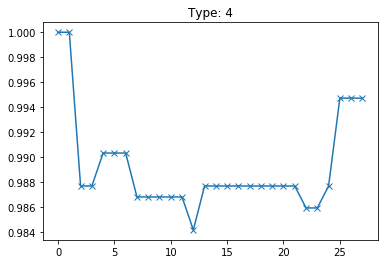

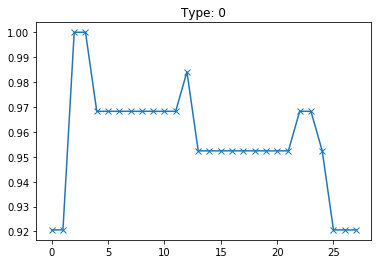

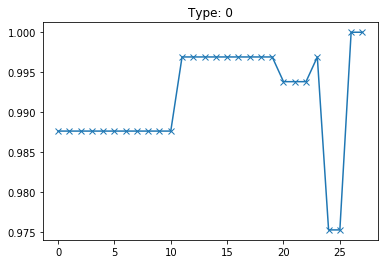

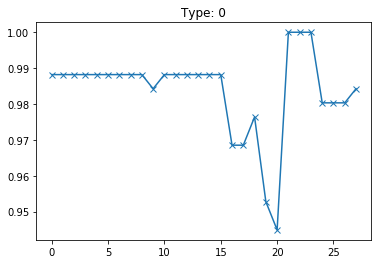

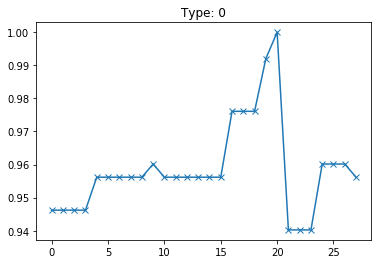

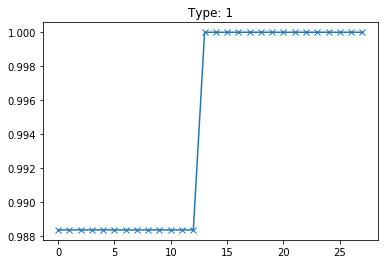

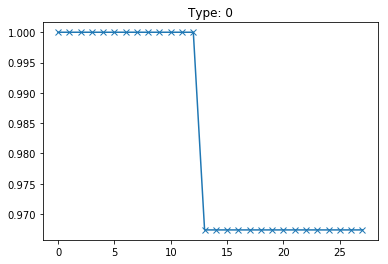

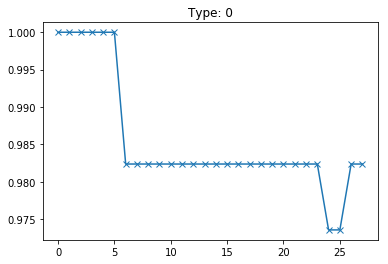

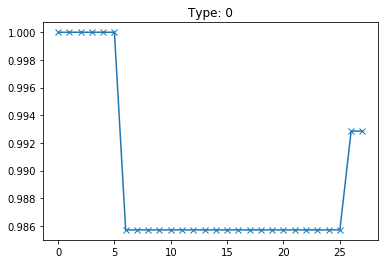

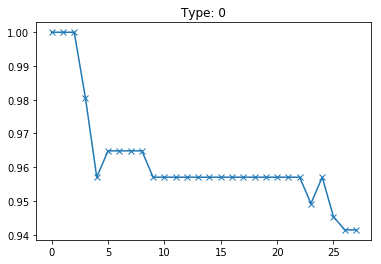

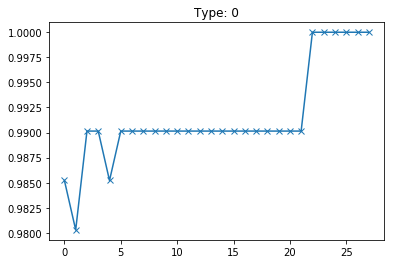

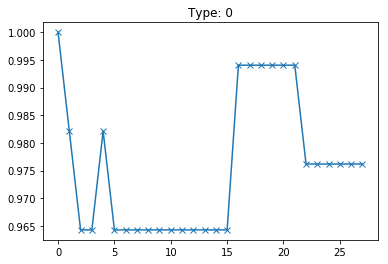

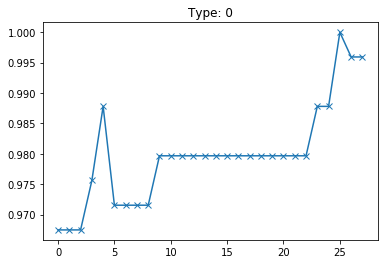

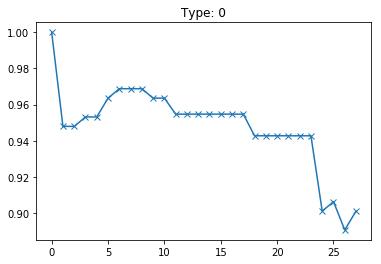

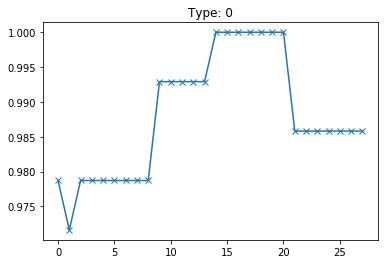

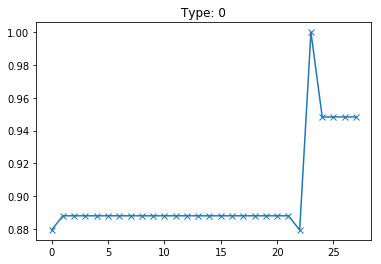

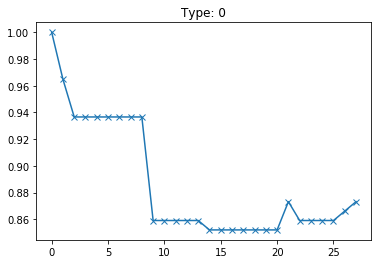

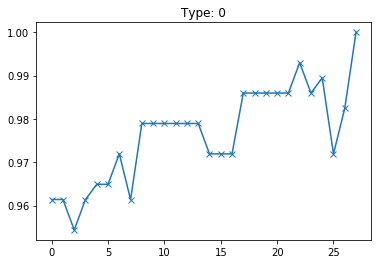

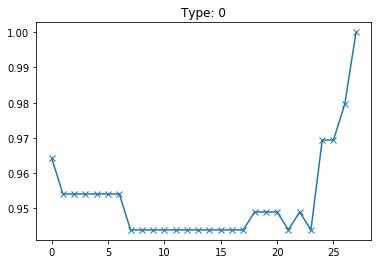

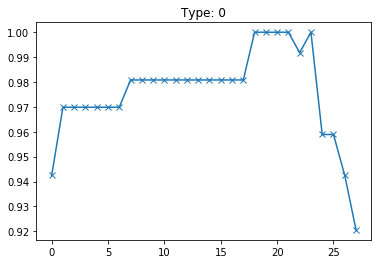

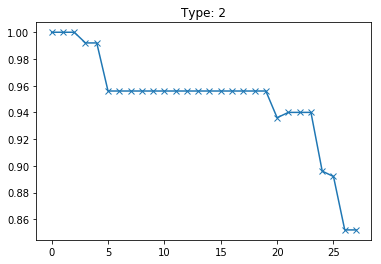

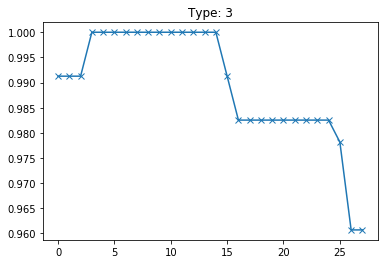

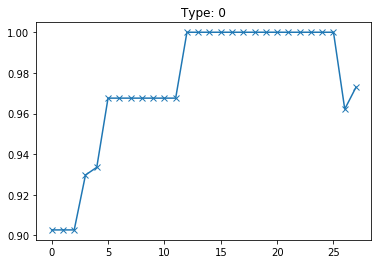

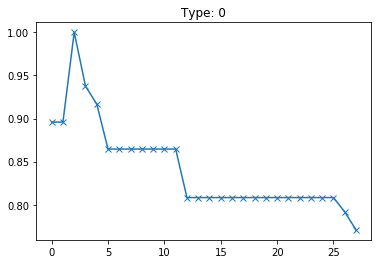

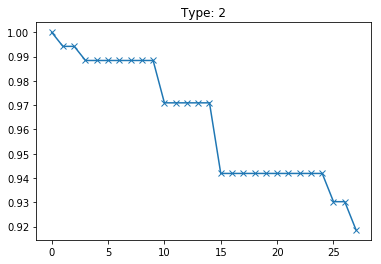

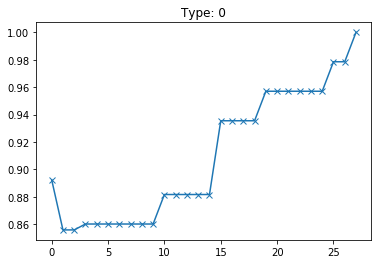

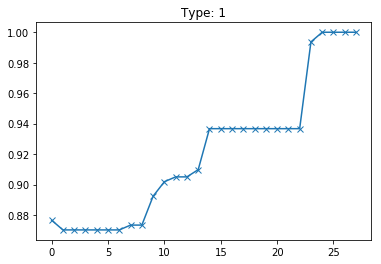

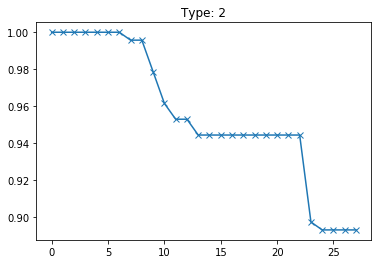

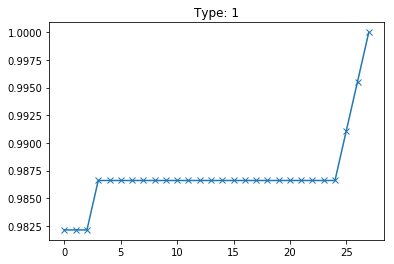

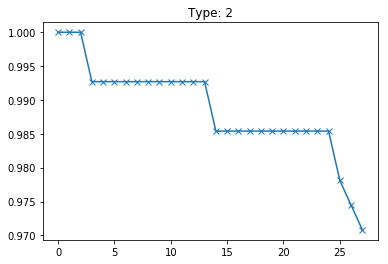

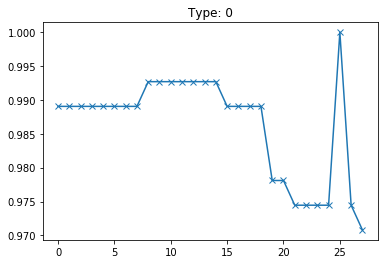

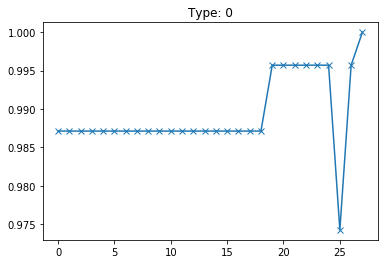

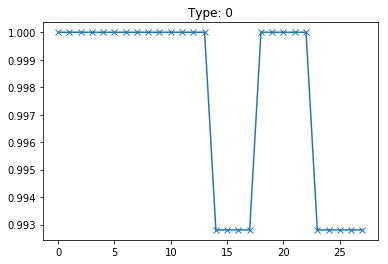

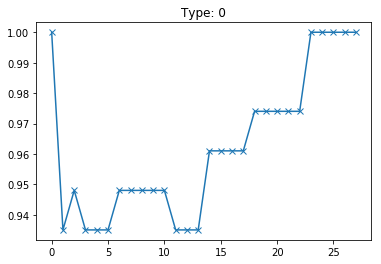

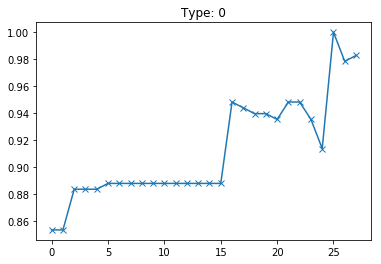

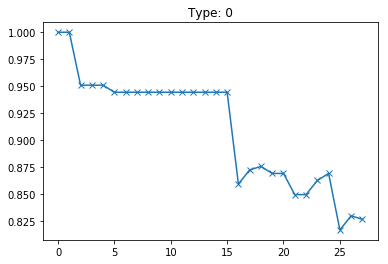

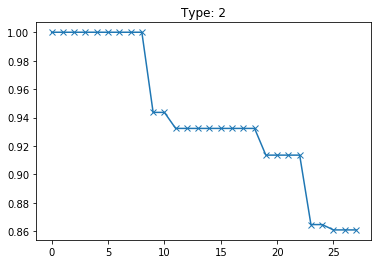

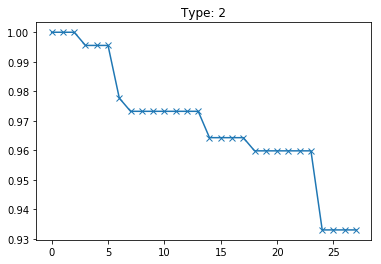

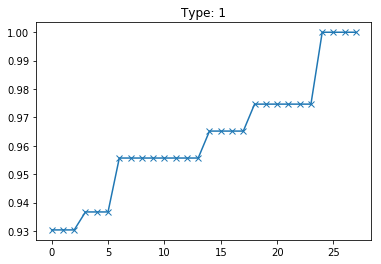

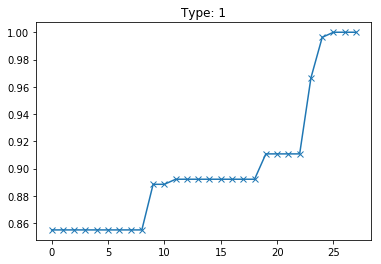

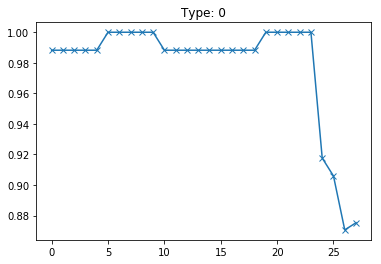

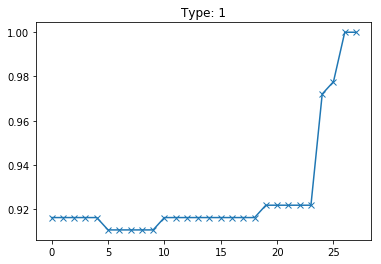

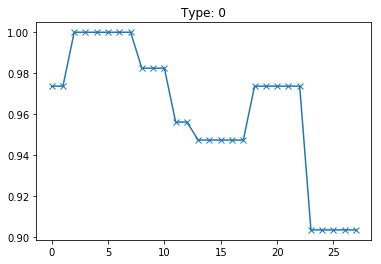

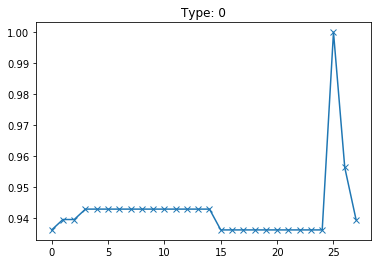

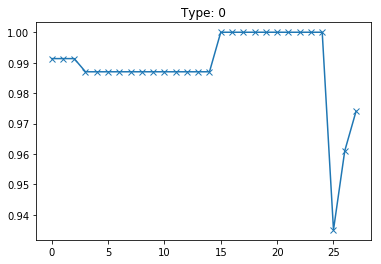

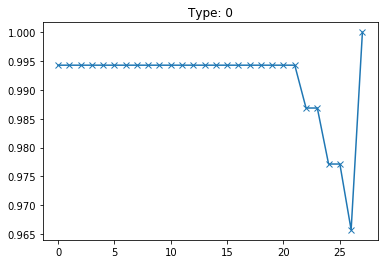

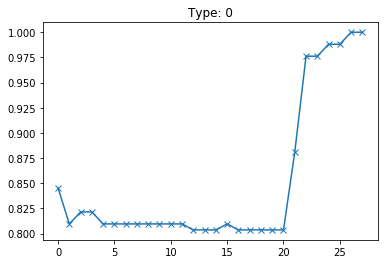

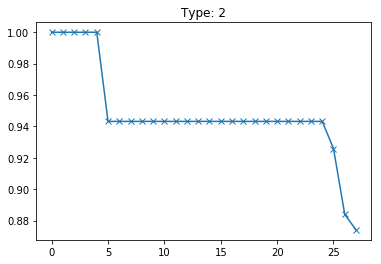

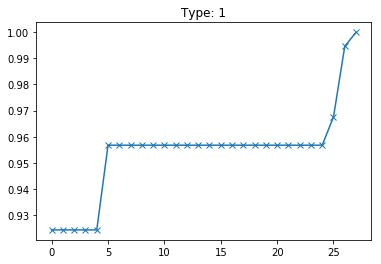

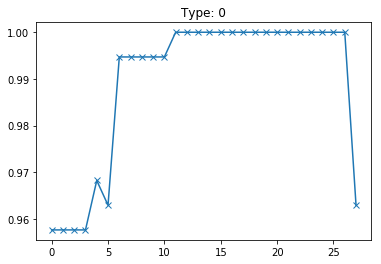

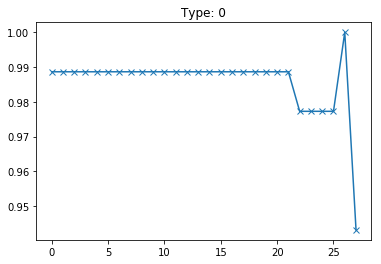

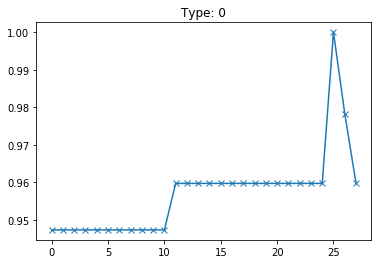

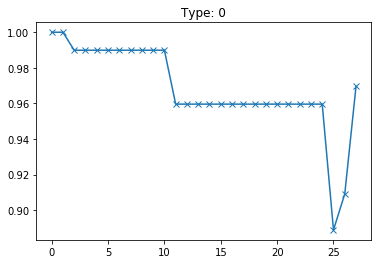

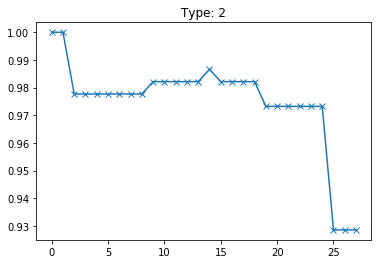

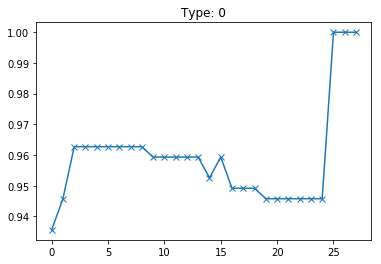

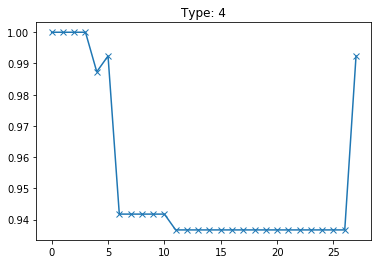

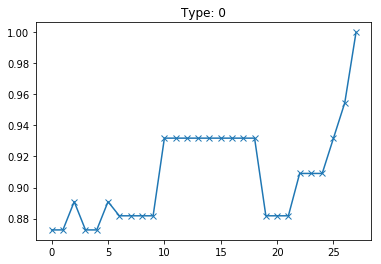

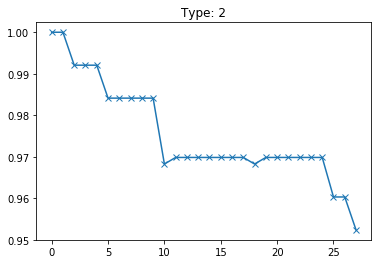

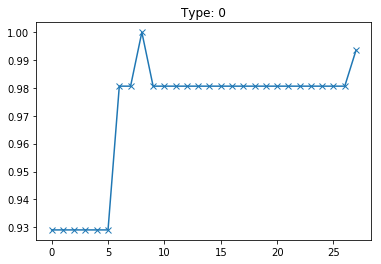

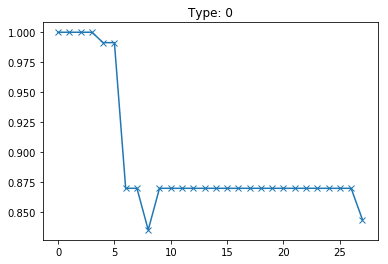

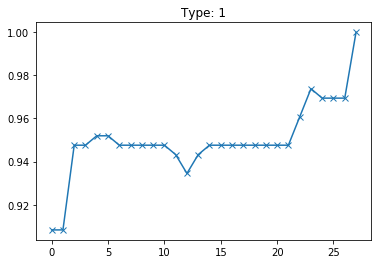

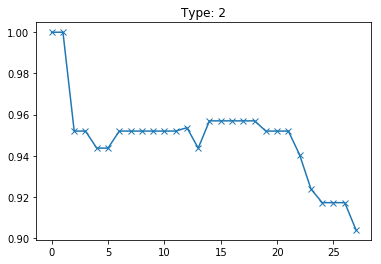

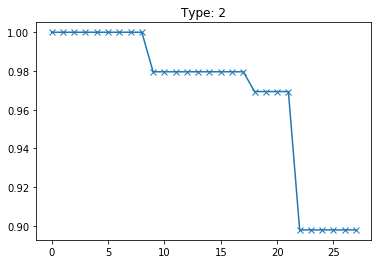

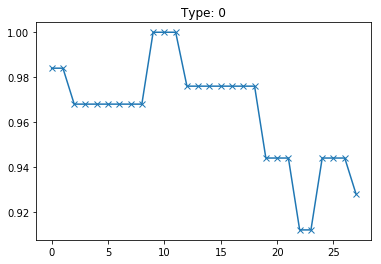

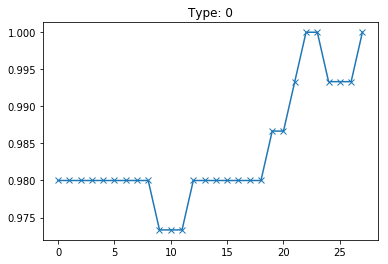

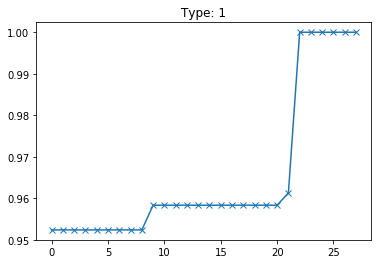

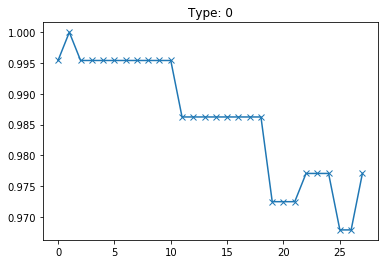

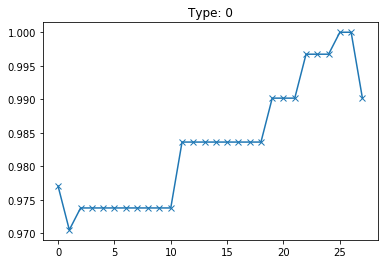

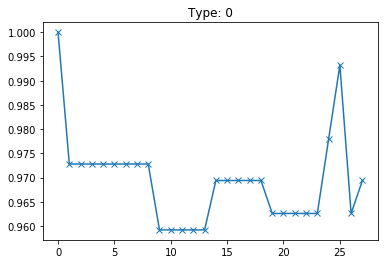

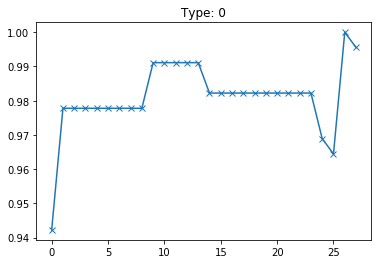

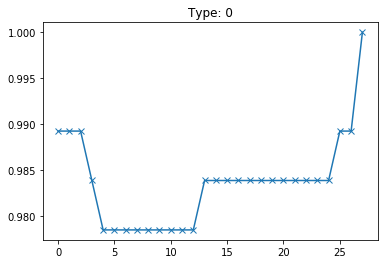

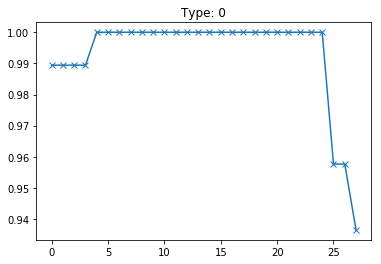

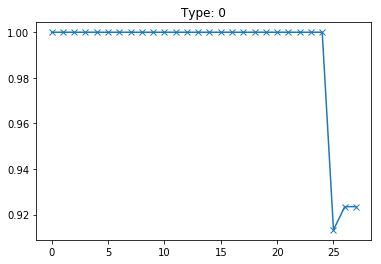

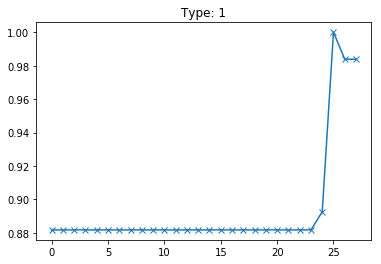

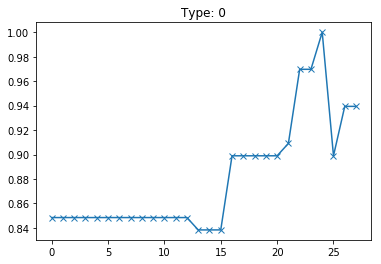

In [25]:
count = 0
                           
for key, value in game_id_to_graph.items():
    x = [i for i in range(0, MIN_GAMES_COUNT-END_NOT_TAKEN)]
    y = [value[i] for i in range(0, MIN_GAMES_COUNT-END_NOT_TAKEN)]
    
    plt.title('Type: {}'.format(detect_graph(y)))
    plt.plot(x, y, marker='x')
    plt.show()
      
    count += 1
    if count > 100:
        break        

In [13]:
Y_new_gen = [
   4, 3, 0, 0, 4, 0, 0, 4, 3, 0,
   1, 0, 1, 3, 3, 1, 2, 0, 2, 0,
   0, 0, 5, 5, 4, 13, 3, 6, 13, 0,
   6, 5, 4, 3, 7, 8, 4, 6, 9, 8,
   2, 9, 10, 5, 9, 10, 2, 1, 2, 6,
   0, 7, 5, 0, 8, 4, 1, 1, 7, 5,
   4, 3, 4, 3, 11, 12, 3, 4, 4, 10,
   4, 10, 9, 3, 3, 4, 8, 0, 5, 4,
   4, 3, 12, 1, 4, 11, 9, 9, 3, 10,
   4, 7, 0, 0, 0, 0, 2, 3, 4, 11
]

In [11]:
X_train =[[] for i in range(0, len(game_id_to_graph))]

index = 0                          
for key, value in game_id_to_graph.items():
    X_train[index] = value
    index += 1
print len (X_train)
print len (X_train[0])


450
28


In [104]:
from scipy.fftpack import dct, idct, fft, hilbert, ifft
def transform_16(x):
    y = dct(x, norm='ortho')
    
    return y[:16]

def transform_4(x):
    y = dct(x, norm='ortho')
    
    return y[:4]

def transform(x):
    return dct(x, norm='ortho')


X_train_dct = [transform(x) for x in X_train]
print len (X_train_dct)
print len (X_train_dct[0])
    

278
28


In [105]:
import numpy as np
from numpy import array

X_train_np = array(X_train)
X_train_dct_np = array(X_train_dct)
X_complex = np.concatenate((X_train_np, X_train_dct_np),axis=1)
print X_complex.shape


(278L, 56L)


In [37]:
Y_form = [
   1, 6, 4, 1, 8, 9, 1, 9, 0, 13,
   8, 10, 11, 12, 2, 5, 11, 7, 7, 8,
   7, 7, 5, 5, 4, 13, 3, 6, 13, 0,
   6, 5, 4, 3, 7, 8, 4, 6, 9, 8,
   2, 9, 10, 5, 9, 10, 2, 1, 2, 6,
   0, 7, 5, 0, 8, 4, 1, 1, 7, 5,
   4, 3, 4, 3, 11, 12, 3, 4, 4, 10,
   4, 10, 9, 3, 3, 4, 8, 0, 5, 4,
   4, 3, 12, 1, 4, 11, 9, 9, 3, 10,
   4, 7, 0, 0, 0, 0, 2, 3, 4, 11,
#  100
   12, 7, 8, 1, 4, 4, 0, 13, 4, 10, 
    0, 9, 3, 4, 5, 3, 4, 5, 6, 9, 
    0, 1, 3, 1, 7, 0, 4, 3, 5, 3,
    7, 13, 5, 0, 0, 0, 0, 0, 9, 0,
    0, 0, 4, 3, 4, 4, 3, 4, 7, 3,
    4, 4, 3, 7, 0, 7, 3, 4, 8, 6, 
    0, 4, 3, 3, 4, 8, 0, 12, 11, 4, 
    10, 8, 7, 4, 4, 3, 11, 12, 0, 0, 
    4, 4, 3, 0, 5, 7, 4, 4, 3, 3,
    7, 8, 0, 3, 0, 8, 8, 7, 8, 2, 
#  200
    1, 5, 5, 6, 6, 9, 2, 3, 9, 10,
    6, 9, 0, 0, 3, 4, 10, 3, 9, 4, 
    3, 13, 9, 3, 4, 0, 0, 5, 1, 10, 
    9, 13, 9, 4, 0, 3, 13, 0, 5, 7,
    6, 4, 3, 8, 0, 6, 5, 0, 6, 5, 
    8, 11, 8, 6, 3, 4, 1, 5, 9, 0,
    1, 6, 5, 4
]

In [55]:
import pandas as pd
Y_dummies = [[] for i in range(0, len(Y_form))]

for index in range(0, len(Y_form)):
    x = Y_form[index]
    if x == 0:
        Y_dummies[index] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    if x == 1 or x == 3:
        Y_dummies[index] = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    if x == 2 or x == 4:
        Y_dummies[index] = [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    if x == 5:
        Y_dummies[index] = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    if x == 6:
        Y_dummies[index] = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    if x == 7:
        Y_dummies[index] = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    if x == 8:
        Y_dummies[index] = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    if x == 9:
        Y_dummies[index] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
    if x == 10:
        Y_dummies[index] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
    if x == 11:
        Y_dummies[index] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
    if x == 12:
        Y_dummies[index] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
    if x == 13:
        Y_dummies[index] = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
        
Y_dummies_np = array(Y_dummies)
Y_origin_np = array(Y_form)
print Y_dummies_np.shape

(264L, 11L)


In [87]:
Y_simple_np = array(Y_simple)
print Y_simple_np.shape

(278L,)


(208L, 56L) (70L, 56L)
(208L,) (70L,)
Правильность на обучающем наборе: 0.990
Правильность на тестовом наборе: 0.543
[1 1 2 1 2 1 5 6 3 1 3 2 1 4 1 6 3 6 1 3 4 6 6 2 1 6 6 1 2 6 1 1 6 6 1 6 1
 6 1 3 1 2 6 6 2 3 4 6 2 6 6 2 4 1 6 4 2 4 2 6 6 4 4 2 4 2 6 6 2 1]
[1 1 2 1 2 1 6 6 1 1 6 2 1 4 1 6 6 2 1 2 1 3 4 2 1 1 6 3 2 2 1 1 3 1 1 2 6
 1 1 6 1 2 6 6 2 6 6 1 2 2 6 2 2 1 6 6 6 4 2 1 1 2 1 2 2 6 6 3 2 1]


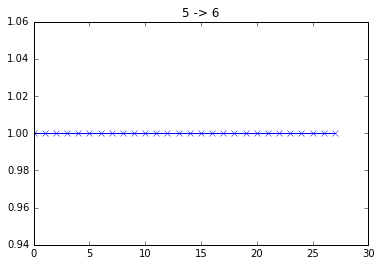

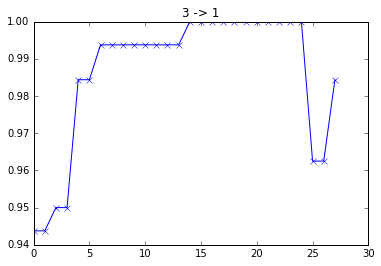

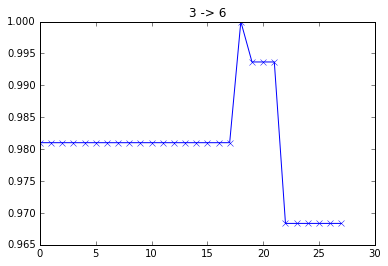

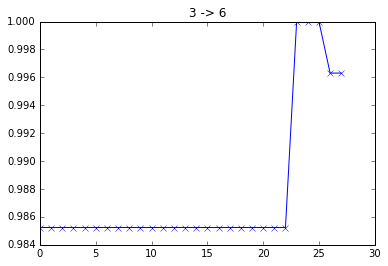

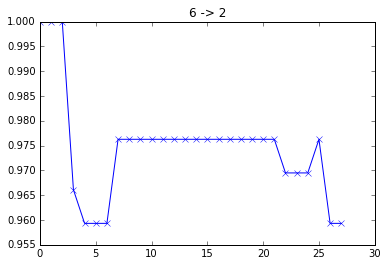

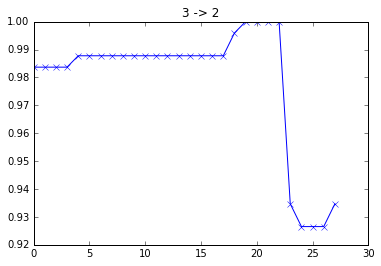

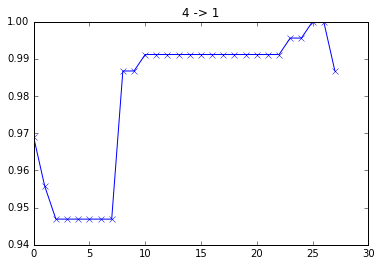

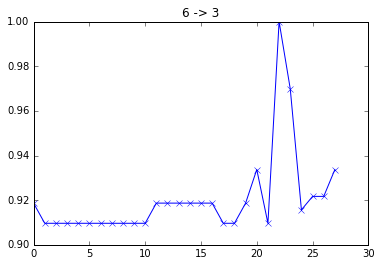

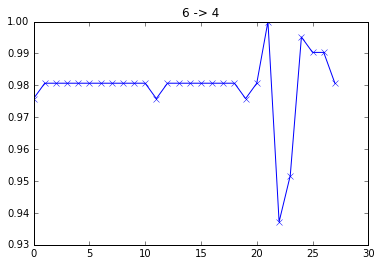

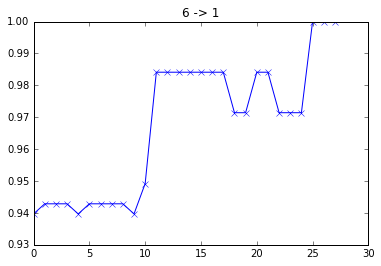

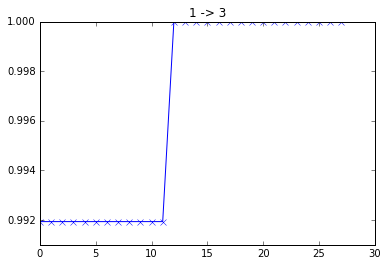

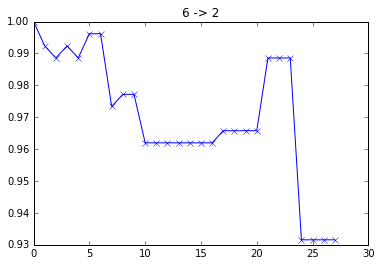

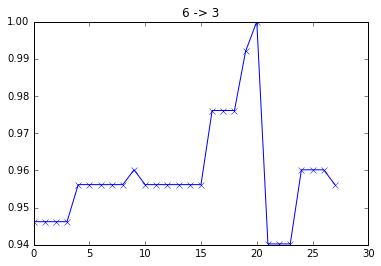

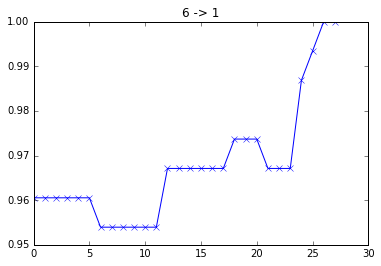

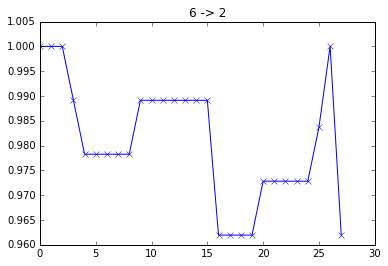

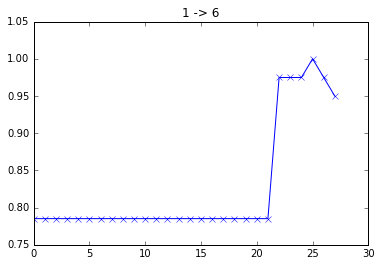

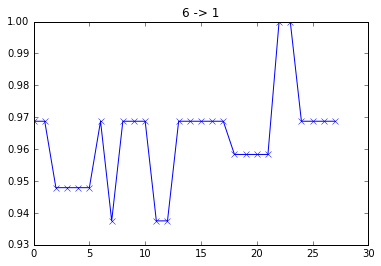

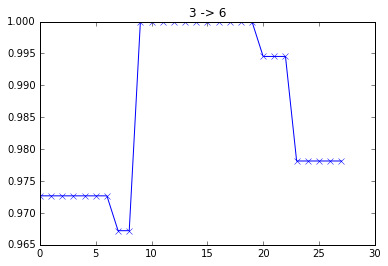

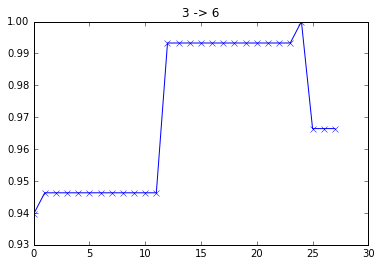

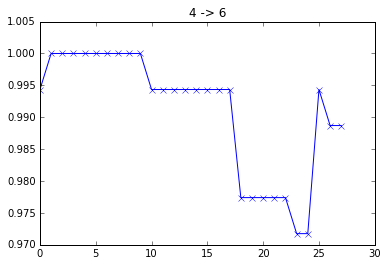

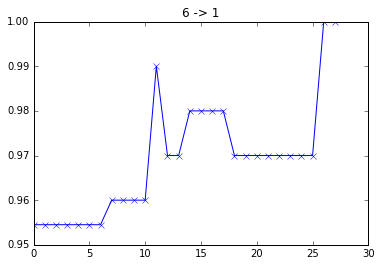

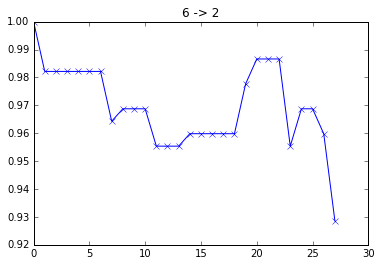

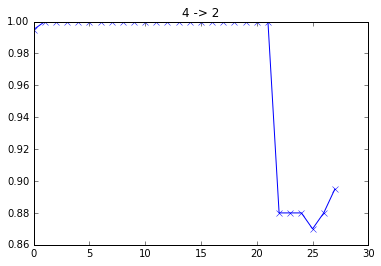

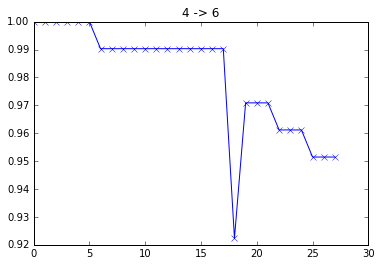

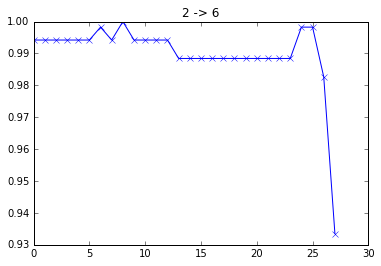

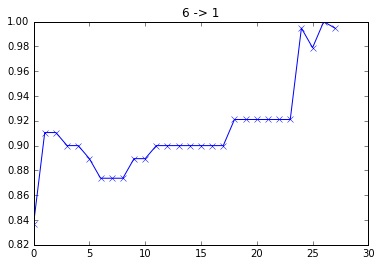

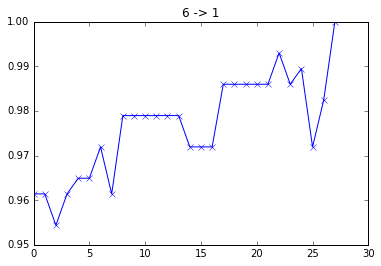

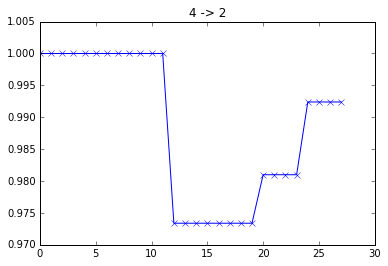

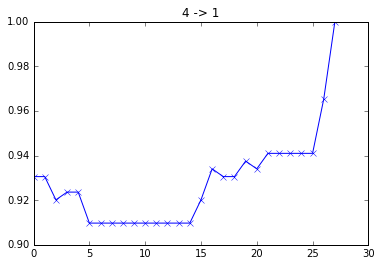

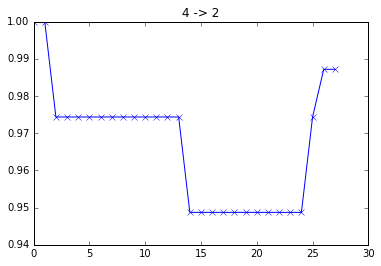

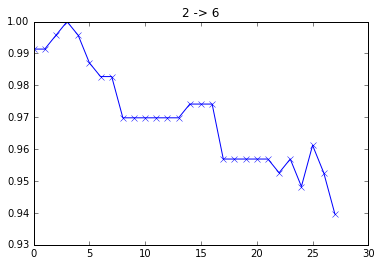

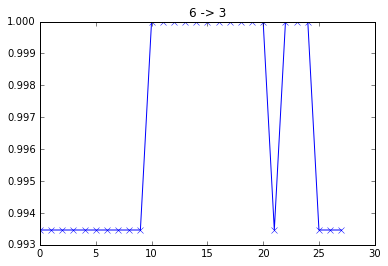

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_complex, Y_simple_np, random_state=0)
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

classifier = RandomForestClassifier(n_estimators=10, random_state=0)
#classifier = GradientBoostingClassifier(learning_rate=0.01, random_state=3)
classifier.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(classifier.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(classifier.score(X_test, y_test)))
y_test_predicted = classifier.predict(X_test)
print y_test
print y_test_predicted

x = [i for i in range(0, MIN_GAMES_COUNT-END_NOT_TAKEN)]

for index in range(0, len(y_test)):
    if y_test[index] != y_test_predicted[index]:
#         print X_test[index]
        plt.title('{} -> {}'.format(y_test[index], y_test_predicted[index]))
        y = [X_test[index][i] for i in range(0, MIN_GAMES_COUNT-END_NOT_TAKEN)]
        plt.plot(x, y, marker='x')
        plt.show()


In [93]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape
print iris.target

classifier = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
classifier.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(classifier.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(classifier.score(X_test, y_test)))

(112L, 4L) (38L, 4L)
(112L,) (38L,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Правильность на обучающем наборе: 0.991
Правильность на тестовом наборе: 1.000


In [7]:
indexes = [i for i in range(0, len(X_train[0]))]
for index in range(0, len(X_train)):
    X = X_train[index]
    Y = Y_train[index]       
#     f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
#     ax1.plot(indexes, X)
#     ax1.set_title('Sharing Y axis')
#     ax2.plot(indexes, Z)
#     ax3.plot(indexes, Y)
    
#     if index >= 50:
#         break

NameError: name 'Y_train' is not defined

In [8]:
from sklearn.cluster import MeanShift, estimate_bandwidth

ms = MeanShift(bandwidth=None, bin_seeding=True)
ms.fit(Y_16_train)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)
print(labels)

NameError: name 'Y_16_train' is not defined

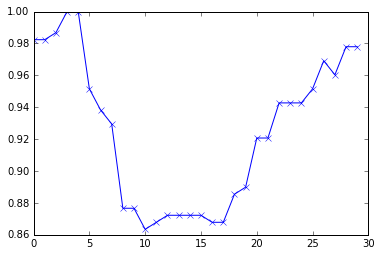

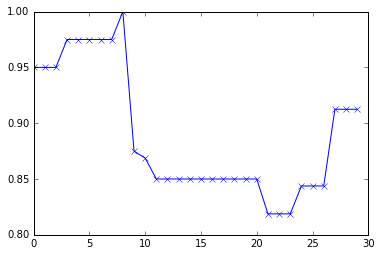

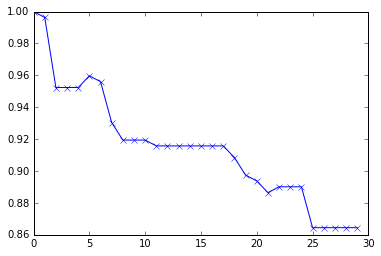

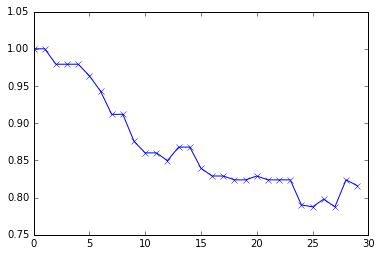

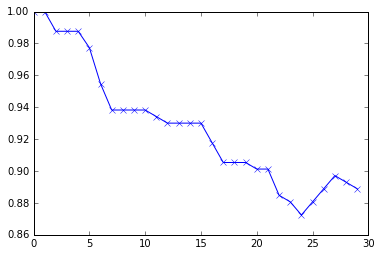

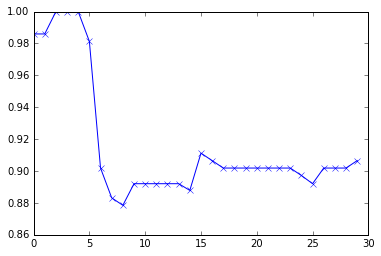

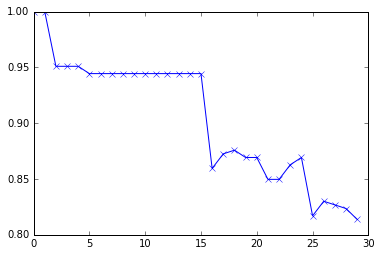

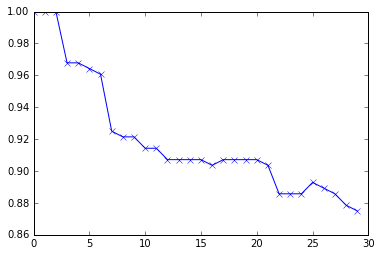

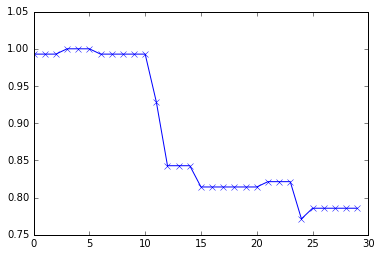

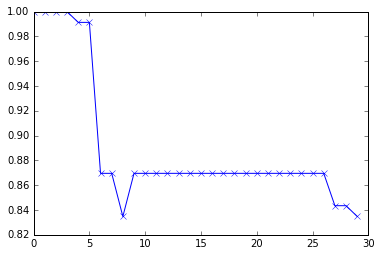

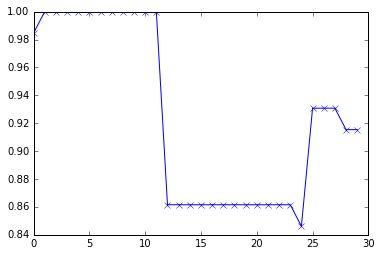

In [11]:
index = 0
for key, value in game_id_to_graph.items():
    x = [i for i in range(0, MIN_GAMES_COUNT)]
    y = value
    
    if labels[index] == 2:
        plt.plot(x, y, marker='x')
        plt.show()
        
    index += 1

        

In [10]:
from sklearn.cluster import KMeans
km = KMeans()
km.fit(Y_train)
km.predict(Y_train)
KM_labels = km.labels_
print(KM_labels)

[1 0 0 1 0 0 5 5 1 0 0 4 0 0 7 1 0 0 0 0 0 0 0 0 4 0 0 7 0 0 4 7 7 0 1 4 0
 1 2 4 0 0 0 0 5 0 0 5 0 0 4 3 0 0 4 0 0 5 0 7 7 5 4 1 0 0 6 7 0 0 7 5 0 1
 2 7 1 4 0 7 7 1 0 2 7 0 5 7 1 0 5 0 2 5 0 2 0 2 7 0 0 0 0 5 4 0 0 0 4 5 5
 7 1 3 5 1 4 0 5 5 7 0 1 0 0 5 4 5 0 1 5 0 3 5 5 4 0 4 0 0 1 5 5 6 3 4 2 0
 1 1 7 5 2 0 7 7 1 3 5 0 0 7 1 5 4 5 0 0 0 4 4 1 0 7 3 5 0 0 5 5 4 7 0 5 0
 0 7 4 1 5 5 3 5 1 0 0 0 5 5 7 5 0 1 0 2 0 0 2 4 0 1 0 5 0 2 0 5 1 7 4 1 0
 0 5 7 0 0 2 2 5 5 0 0 3 0 6 0 4 0 5 5 5 5 4 0 2 0 5 0 0 5 0 5 5 2 7 0 0 7
 5 1 4 1 7]


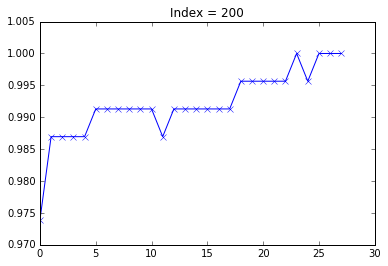

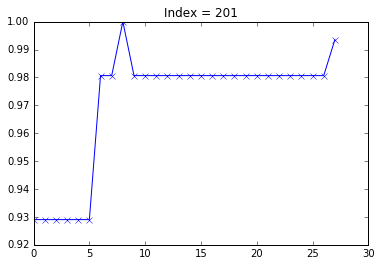

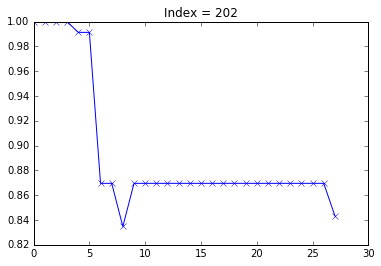

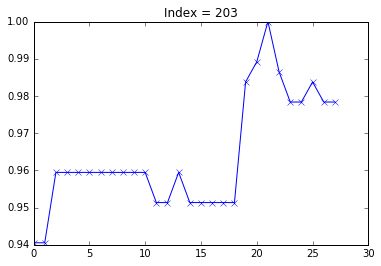

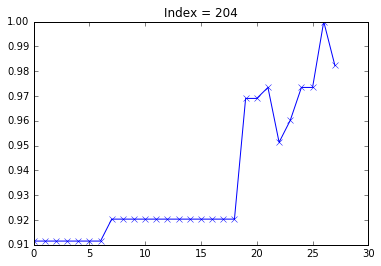

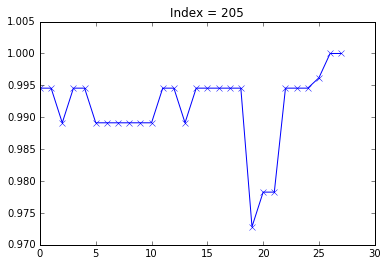

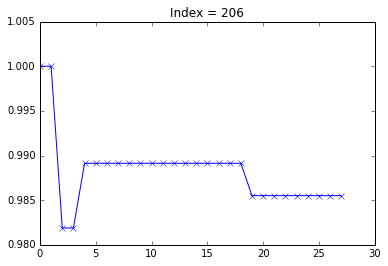

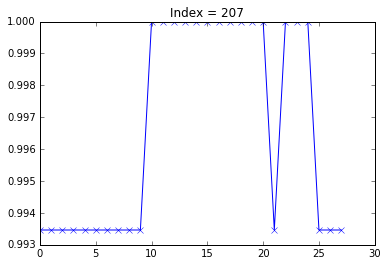

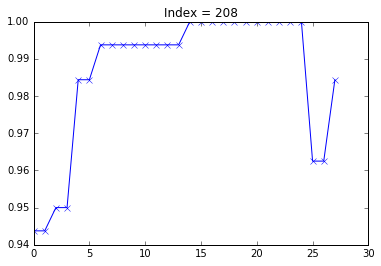

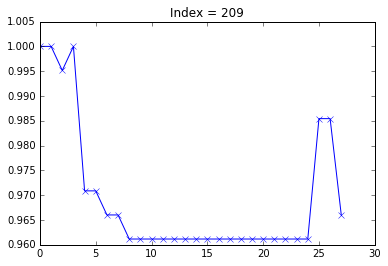

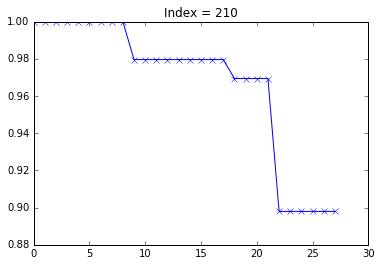

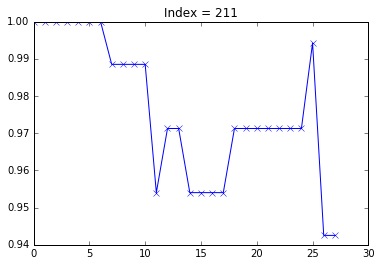

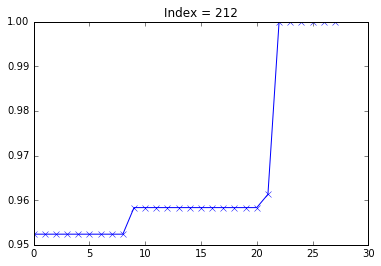

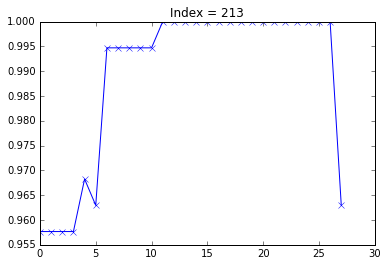

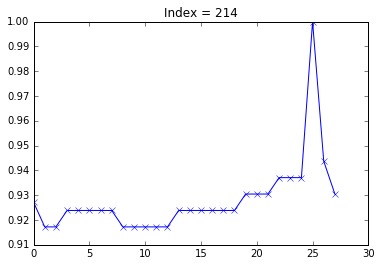

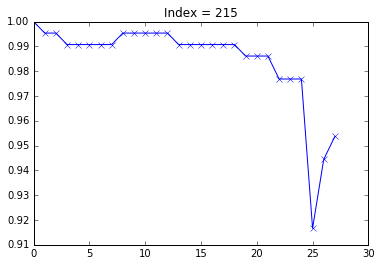

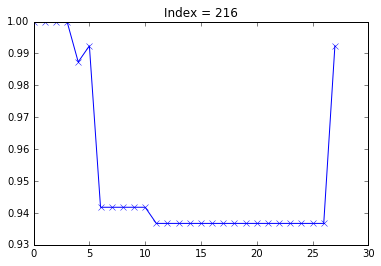

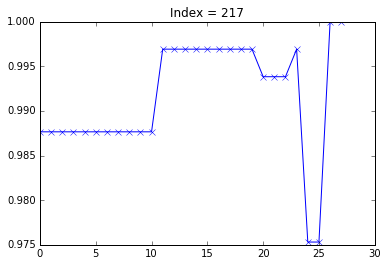

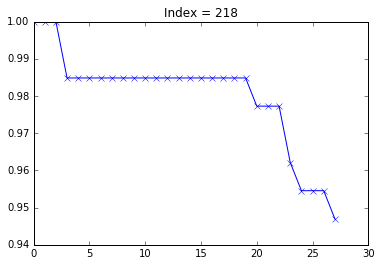

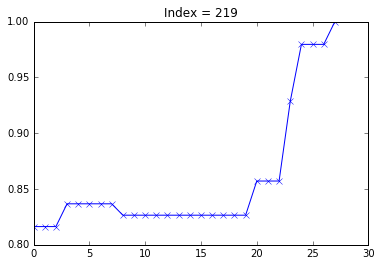

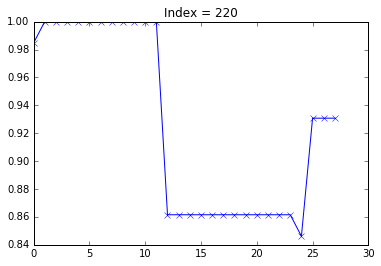

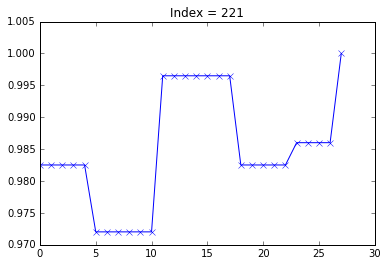

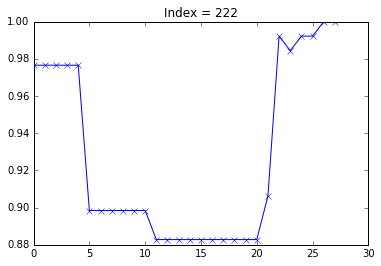

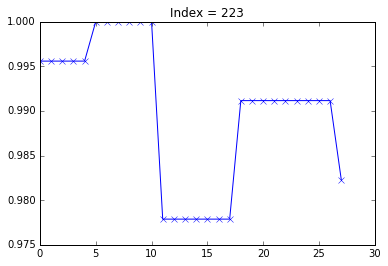

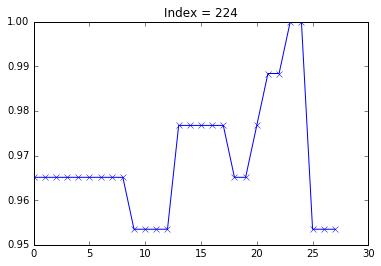

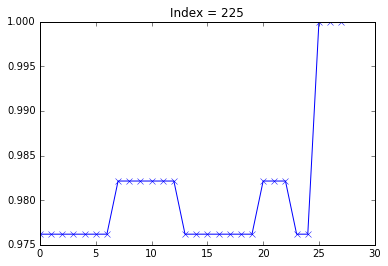

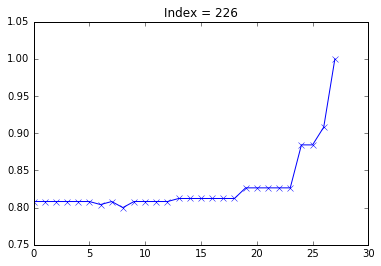

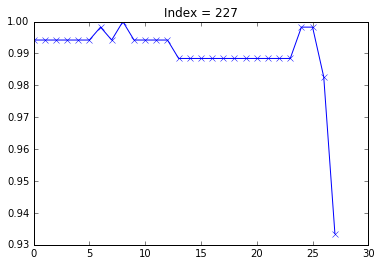

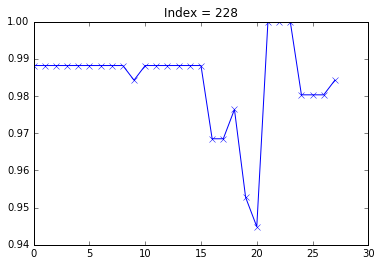

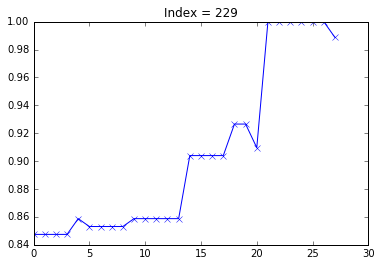

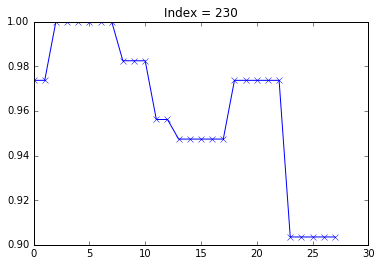

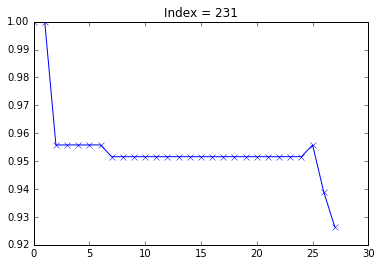

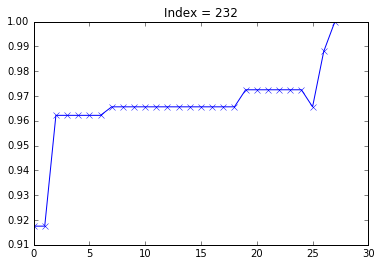

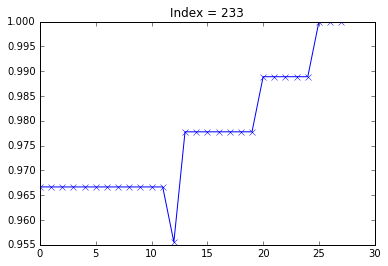

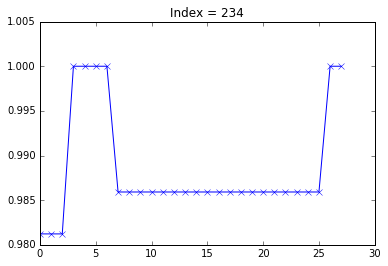

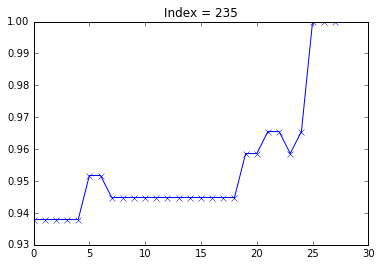

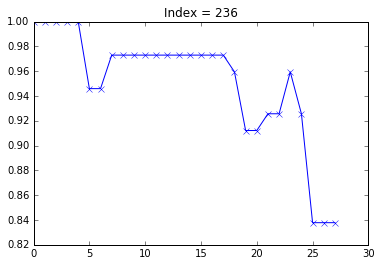

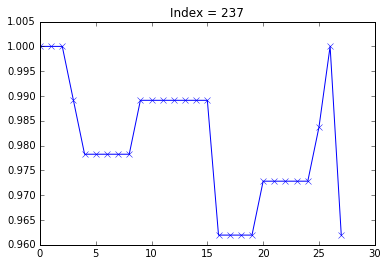

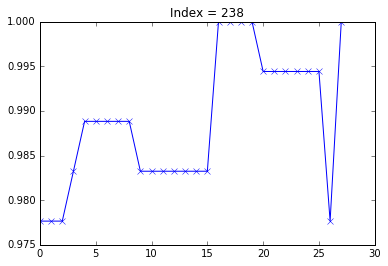

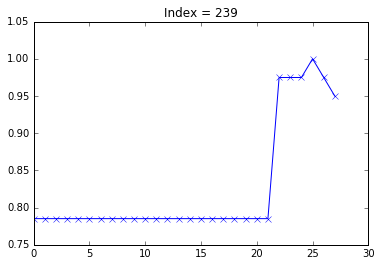

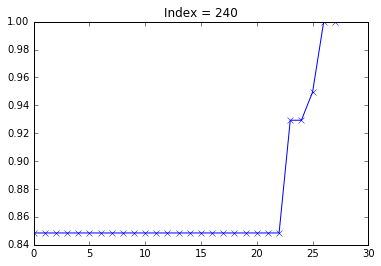

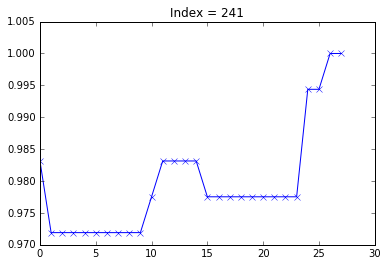

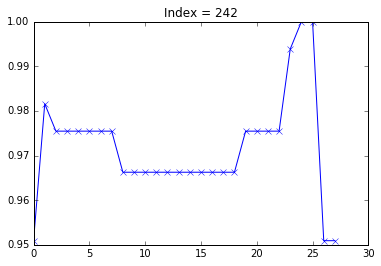

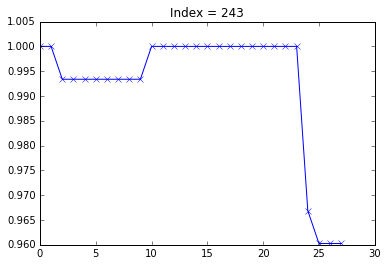

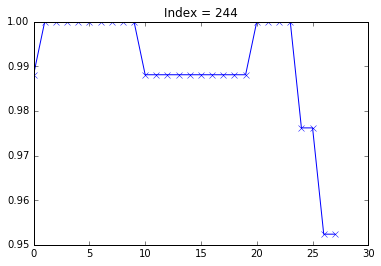

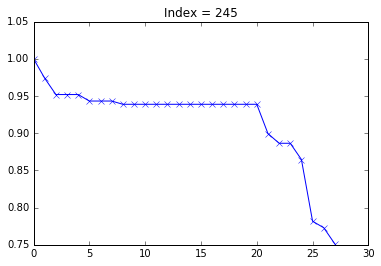

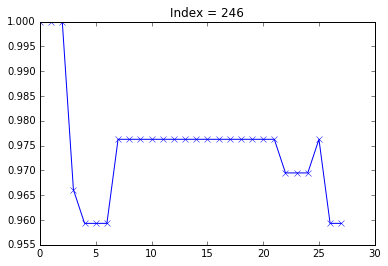

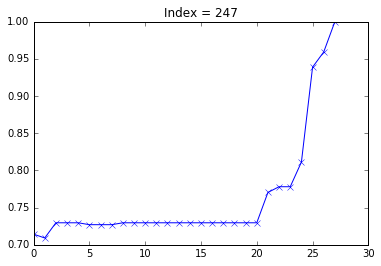

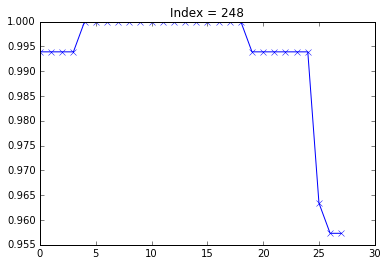

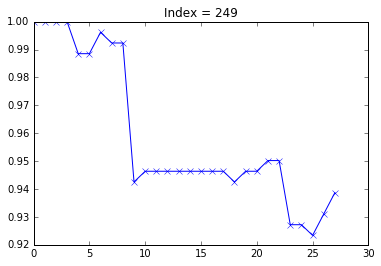

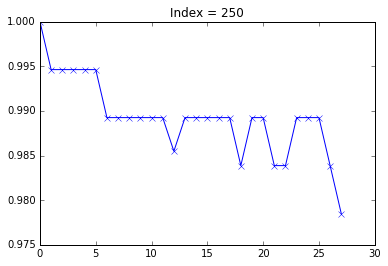

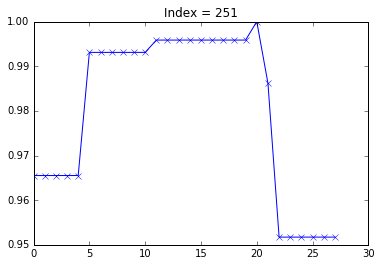

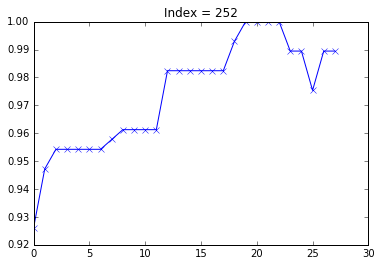

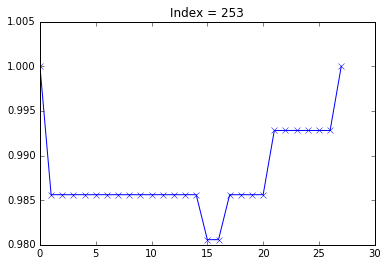

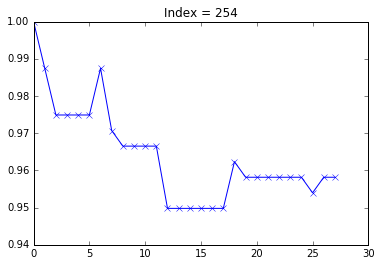

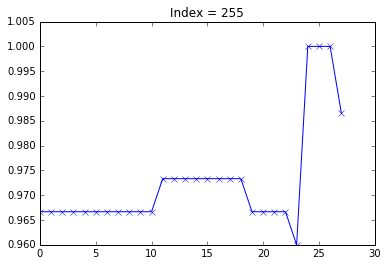

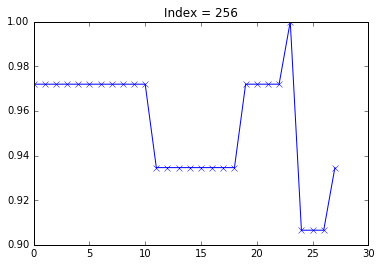

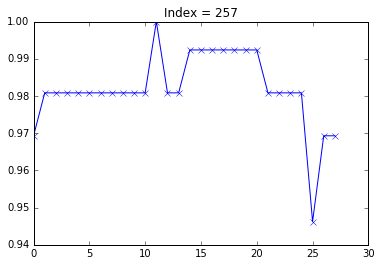

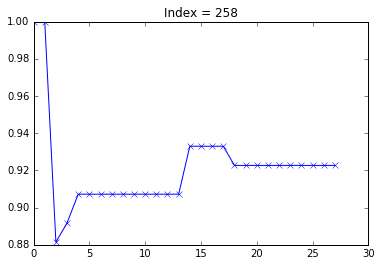

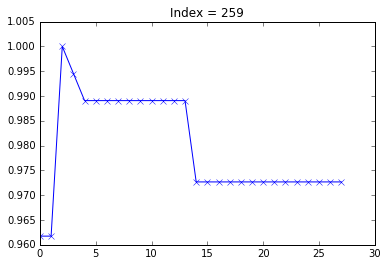

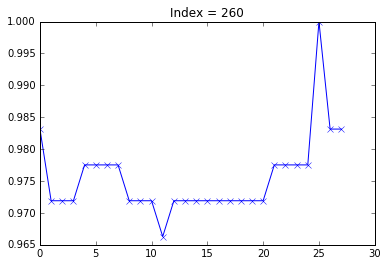

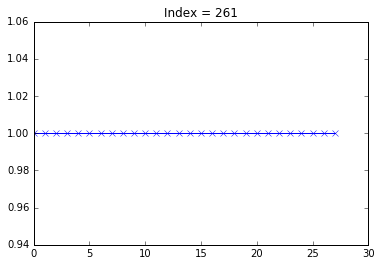

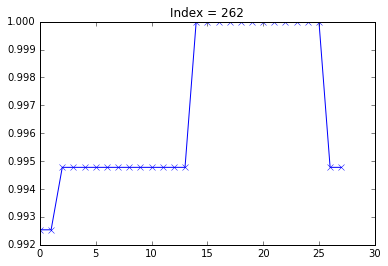

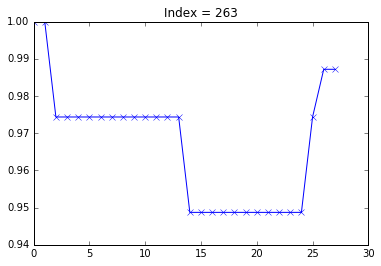

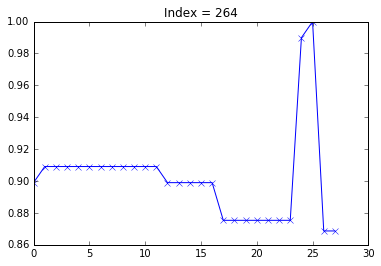

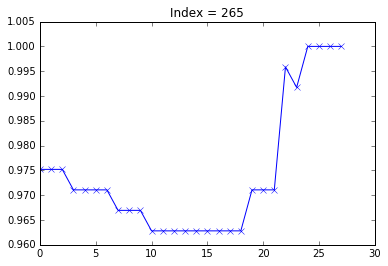

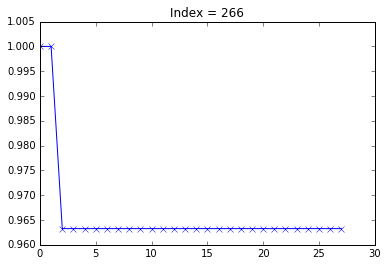

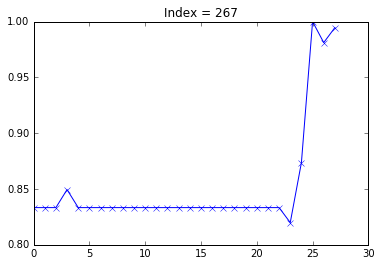

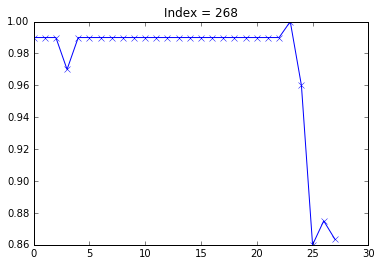

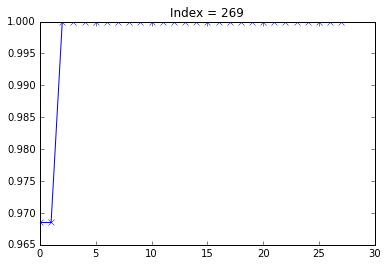

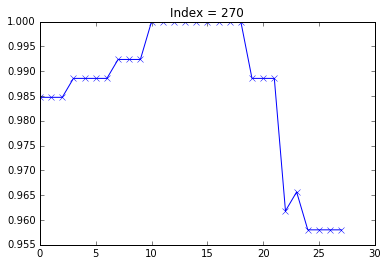

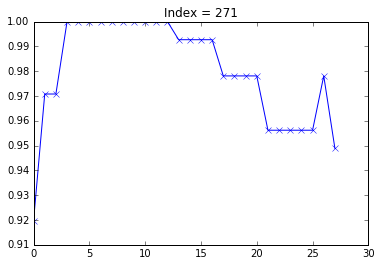

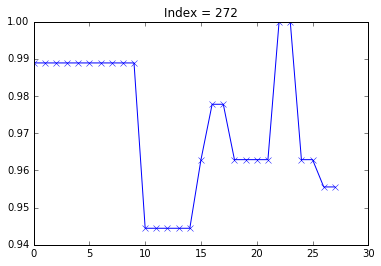

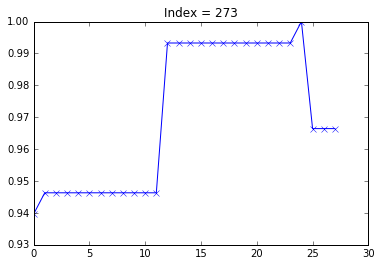

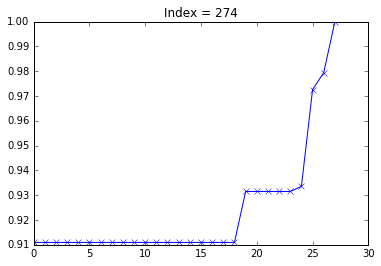

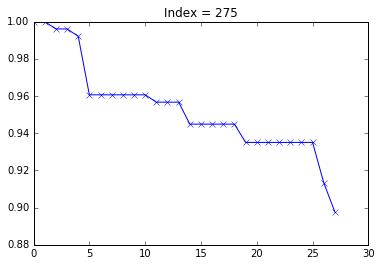

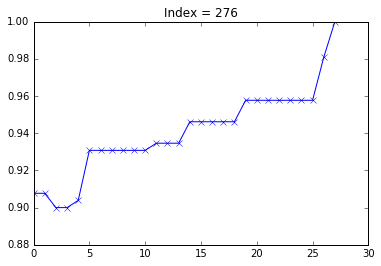

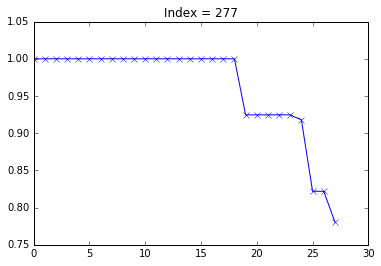

In [79]:
index = 0
for key, value in game_id_to_graph.items():
    x = [i for i in range(0, MIN_GAMES_COUNT-END_NOT_TAKEN)]
    y = value
    
#     if KM_labels[index] == 0:
    if index >=200 and index < 300:
        plt.title('Index = {}'.format(index))
        plt.plot(x, y, marker='x')
        plt.show()
        
    index += 1

In [86]:
Y_simple = [
1, 4, 2, 1, 6, 6, 1, 6, 6, 2,
6, 6, 1, 2, 2, 1, 6, 6, 6, 6,
4, 3, 3, 3, 6, 6, 6, 4, 1, 6,
4, 6, 2, 6, 6, 6, 2, 4, 4, 6,
2, 6, 6, 3, 4, 3, 2, 1, 4, 4,
6, 6, 3, 6, 6, 2, 1, 1, 6, 2,
2, 1, 2, 1, 1, 2, 1, 2, 6, 6,
6, 4, 6, 6, 2, 6, 4, 6, 1, 6,
1, 2, 1, 2, 1, 2, 1, 6, 6, 1,
6, 6, 6, 6, 6, 6, 2, 1, 2, 1,
#100
2, 1, 2, 1, 2, 6, 6, 6, 2, 6,
6, 6, 6, 6, 2, 4, 1, 2, 1, 3,
4, 4, 6, 1, 1, 1, 6, 2, 6, 2,
6, 3, 1, 3, 1, 3, 4, 6, 6, 4,
2, 6, 6, 6, 6, 2, 1, 2, 2, 1,
6, 6, 1, 2, 6, 1, 6, 4, 3, 3,
1, 2, 4, 2, 4, 6, 6, 2, 1, 3,
2, 6, 6, 2, 1, 2, 2, 4, 2, 6,
2, 6, 2, 1, 1, 6, 2, 3, 3, 4,
4, 2, 6, 6, 2, 3, 2, 2, 6, 6,
#200
1, 1, 2, 6, 1, 6, 6, 6, 3, 4,
2, 6, 1, 3, 3, 4, 4, 6, 2, 1,
4, 6, 4, 6, 6, 6, 1, 2, 6, 1,
6, 2, 1, 1, 6, 1, 6, 6, 6, 1,
1, 1, 6, 2, 6, 2, 6, 1, 2, 2,
6, 3, 6, 4, 6, 6, 6, 6, 4, 3, 
6, 5, 3, 4, 6, 4, 2, 1, 2, 1, 
3, 3, 6, 3, 1, 2, 1, 2
]